<h1 align='center'> Analisis de tenistas argentinos <h1>


**Se toma Base de datos con los rankings de 1990 a 2019**

In [20]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns

# Ignorar la advertencia de tipo de datos al leer el archivo CSV
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

# Leer el archivo CSV
atp_data = pd.read_csv('ATP_Rankings_1990-2019.csv')

# Restaurar las advertencias para otros posibles problemas
warnings.resetwarnings()

print(atp_data.head(5))
print(atp_data.dtypes)






         Date Gender     Type Ranking         Player Country  Age Points  \
0  1990-01-01    men  singles       1     Ivan Lendl     USA   29      0   
1  1990-01-01    men  singles       2   Boris Becker     GER   22      0   
2  1990-01-01    men  singles       3  Stefan Edberg     SWE   23      0   
3  1990-01-01    men  singles       4   Brad Gilbert     USA   28      0   
4  1990-01-01    men  singles       5   John McEnroe     USA   30      0   

   Tournaments  
0            0  
1            0  
2            0  
3            0  
4            0  
Date           object
Gender         object
Type           object
Ranking        object
Player         object
Country        object
Age             int64
Points         object
Tournaments     int64
dtype: object


**Borro las columnas que no tienen utilidad**

In [21]:
atp_data = atp_data.drop(['Points', 'Tournaments', 'Gender', 'Type'], axis=1)


**Convertir columna de fechas a formato de fecha y extraer el año**

In [22]:

atp_data['Date'] = pd.to_datetime(atp_data['Date'])
atp_data['Year'] = atp_data['Date'].dt.year

**Contemplo que no faltan datos**

<AxesSubplot: >

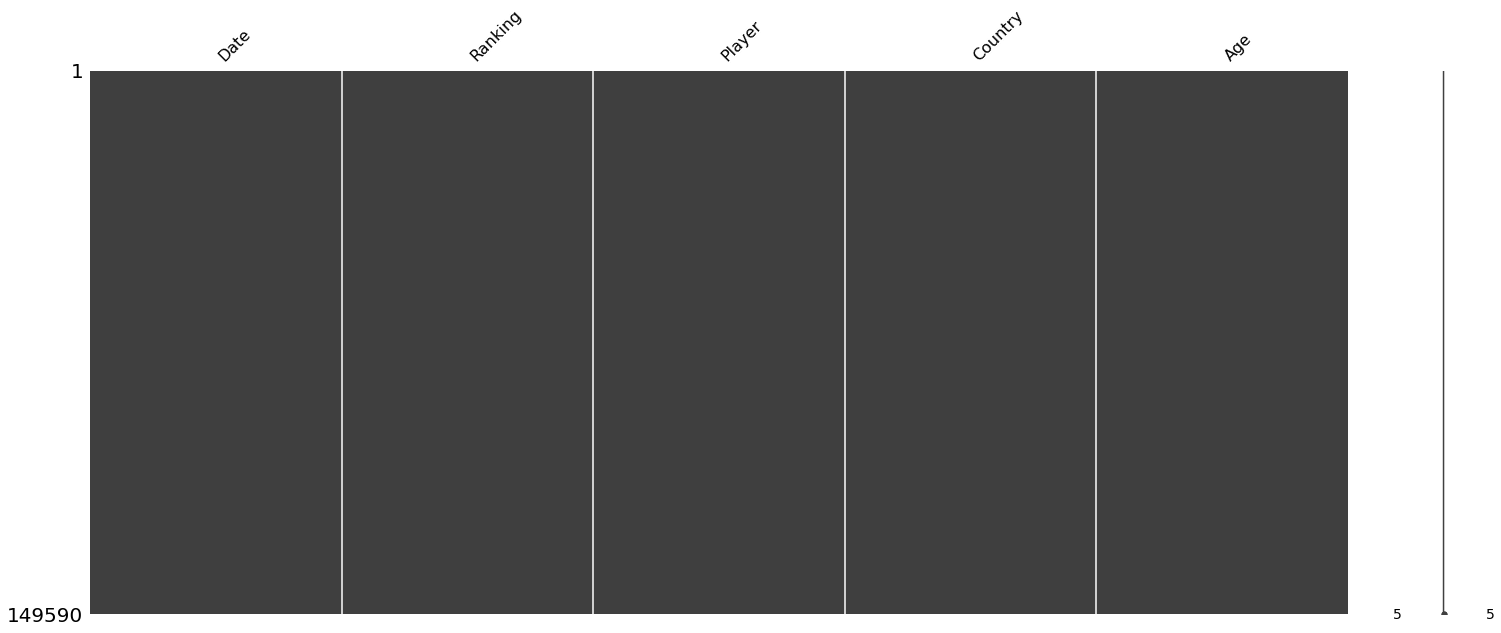

In [16]:
import missingno as msno
import warnings

# Cargar el DataFrame y generar la matriz de valores faltantes
msno.matrix(atp_data)



**Se contempla la evolución de los tenistas argentinos en el Top 100 entre 1990 y 2019**

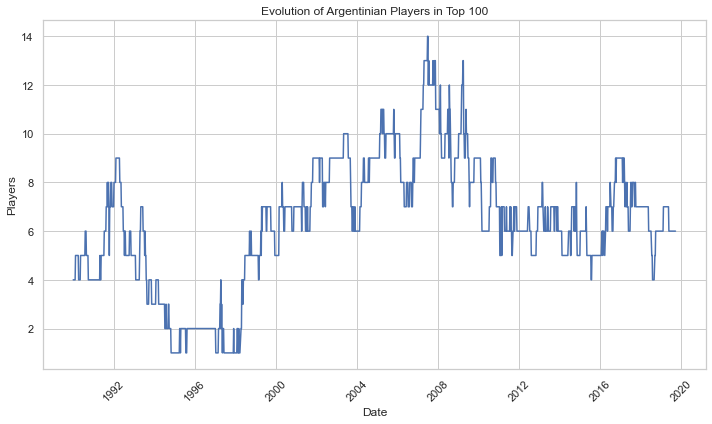

In [5]:


# Filtrar solo los jugadores argentinos
Argentina_data = atp_data[atp_data['Country'] == 'ARG']

# Contar el número de jugadores argentinos en el top 100 en cada fecha
num_argentinian_players = Argentina_data.groupby('Date')['Ranking'].count()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=num_argentinian_players.index, y=num_argentinian_players.values)
plt.title('Evolution of Argentinian Players in Top 100')
plt.xlabel('Date')
plt.ylabel('Players')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



**Se contempla la evolución en un gráfico de barras a los tenistas argentinos en el Top 100 entre 1990 y 2019**

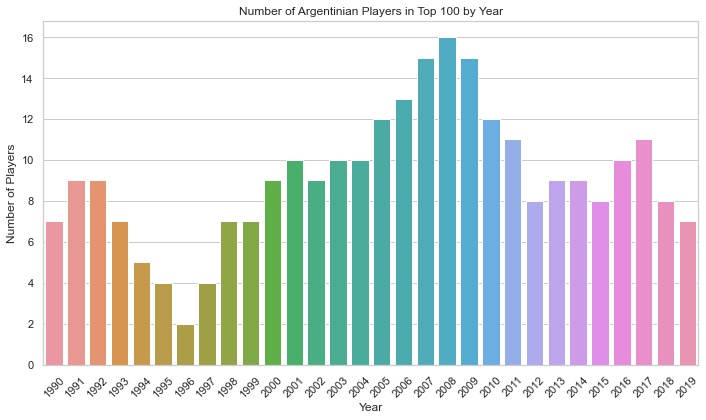

In [6]:

# Filtrar solo los jugadores argentinos
Argentina_data = atp_data[atp_data['Country'] == 'ARG']

# Contar el número de jugadores argentinos en el top 100 en cada año
num_argentinian_players = Argentina_data.groupby('Year')['Player'].nunique()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=num_argentinian_players.index, y=num_argentinian_players.values)
plt.title('Number of Argentinian Players in Top 100 by Year')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Se contempla la evolución en un gráfico de barras a los tenistas argentinos en el Top 10 entre 1990 y 2019**

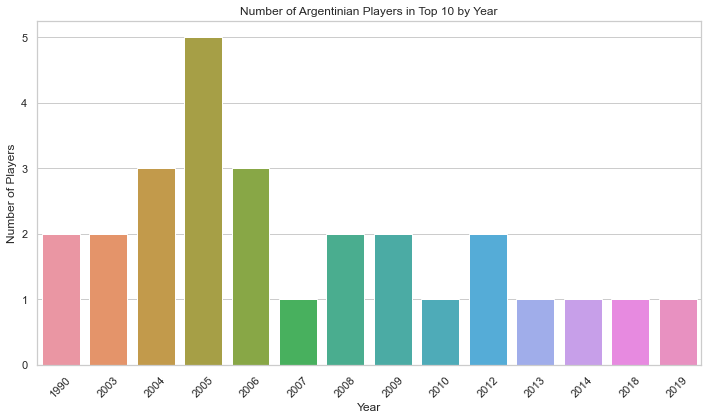

In [17]:


# Convertir la columna "Ranking" a tipo numérico
atp_data['Ranking'] = pd.to_numeric(atp_data['Ranking'], errors='coerce')

# Filtrar solo los jugadores argentinos con Ranking igual o inferior a 10
Argentina_data = atp_data[(atp_data['Country'] == 'ARG') & (atp_data['Ranking'] <= 10)]

# Contar el número de jugadores argentinos en el top 10 en cada año
num_argentinian_players = Argentina_data.groupby('Year')['Player'].nunique()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=num_argentinian_players.index, y=num_argentinian_players.values)
plt.title('Number of Argentinian Players in Top 10 by Year')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Se ha preparado una tabla con el nombre de los tenistas argentinos en el top 10**

In [12]:

# Filtrar solo los jugadores argentinos con Ranking igual o inferior a 10
Argentina_data = atp_data[(atp_data['Country'] == 'ARG') & (atp_data['Ranking'] <= 10)].copy()

# Agregar una columna con el año de cada fecha usando .loc[]
Argentina_data.loc[:, 'Year'] = Argentina_data['Date'].dt.year

# Contar el número de jugadores únicos en el top 100 en cada año
num_argentinian_players = Argentina_data.groupby('Year')['Player'].agg(lambda x: ', '.join(x.unique())).reset_index()

# Formatear los datos en una tabla
table = tabulate(num_argentinian_players, headers='keys', tablefmt='pretty')

# Imprimir la tabla
print("Número de Jugadores Argentinos en el Top 10 por Año:")
print(table)


Número de Jugadores Argentinos en el Top 10 por Año:
+----+------+-----------------------------------------------------------------------------------+
|    | Year |                                      Player                                       |
+----+------+-----------------------------------------------------------------------------------+
| 0  | 1990 |                           Alberto Mancini, Martin Jaite                           |
| 1  | 2003 |                         David Nalbandian, Guillermo Coria                         |
| 2  | 2004 |                 Guillermo Coria, David Nalbandian, Gaston Gaudio                  |
| 3  | 2005 | Guillermo Coria, David Nalbandian, Gaston Gaudio, Guillermo Canas, Mariano Puerta |
| 4  | 2006 |                 David Nalbandian, Guillermo Coria, Gaston Gaudio                  |
| 5  | 2007 |                                 David Nalbandian                                  |
| 6  | 2008 |                      David Nalbandian, Juan Martin 

**Edad donde los tenistas Top 10 argentinos alcanzaron su mejor ranking**

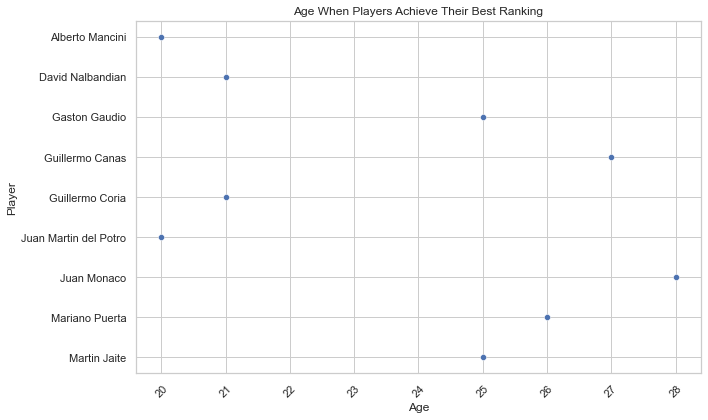

In [18]:
# Filtrar solo los jugadores argentinos con Ranking igual o inferior a 10
Argentina_data = atp_data[(atp_data['Country'] == 'ARG') & (atp_data['Ranking'] <= 10)].copy()

# Obtener la edad en la que los jugadores alcanzan su mejor ranking
best_rank_age = Argentina_data.groupby('Player')['Age'].min()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de dispersión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_rank_age.values, y=best_rank_age.index)
plt.title('Age When Players Achieve Their Best Ranking')
plt.xlabel('Age')
plt.ylabel('Player')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Se muestra la edad en donde los tenistas de todo el mundo alcanzaron su mejor ranking y se realiza la comparación con los argentinos**

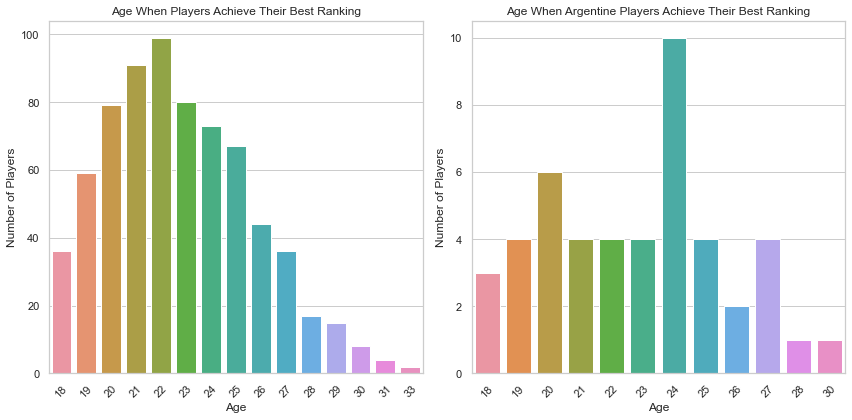

In [32]:

# Obtener la edad en la que los jugadores alcanzan su mejor ranking
best_rank_age = atp_data.groupby('Player')['Age'].min()

# Obtener la cantidad de jugadores que tienen su mejor ranking a cada edad
age_rank_count = best_rank_age.value_counts().sort_index()

# Filtrar edades entre 18 y 33 años
age_rank_count_filtered = age_rank_count[(age_rank_count.index >= 18) & (age_rank_count.index <= 33)]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el primer gráfico de barras utilizando Seaborn
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=age_rank_count_filtered.index, y=age_rank_count_filtered.values)
plt.title('Age When Players Achieve Their Best Ranking')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()

# Filtrar solo los jugadores argentinos
Argentina_data = atp_data[atp_data['Country'] == 'ARG']

# Obtener la edad en la que los jugadores argentinos alcanzan su mejor ranking
best_rank_age_argentina = Argentina_data.groupby('Player')['Age'].min()

# Obtener la cantidad de jugadores argentinos que tienen su mejor ranking a cada edad
age_rank_count_argentina = best_rank_age_argentina.value_counts().sort_index()

# Filtrar edades entre 18 y 33 años para jugadores argentinos
age_rank_count_argentina_filtered = age_rank_count_argentina[(age_rank_count_argentina.index >= 18) & (age_rank_count_argentina.index <= 33)]

# Crear el segundo gráfico de barras utilizando Seaborn
plt.subplot(1, 2, 2)
sns.barplot(x=age_rank_count_argentina_filtered.index, y=age_rank_count_argentina_filtered.values)
plt.title('Age When Argentine Players Achieve Their Best Ranking')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar ambos gráficos
plt.show()

A nivel mundial, el gráfico demuestra que a los 23 años es la edad promedio donde los tenistas obtienen su mejor ranking. Se incrementa desde los 18 hasta los 23, para comenzar a descender. Siendo un gráfico progresivo, sin grandes irrupciones. Luego de los 27 años, es dificil que un tenista alcance su mejor ranking.
Para los tenistas argentinos es realmente similar desde los 18 hasta los 27, sin embargo a los 24 años se observa un pico importante, siendo la mejor edad para la mayoría.